In [7]:
"""
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle
"""

'\nCreated on Thur Sep  14 00:25:54 2023\n@author: Fernandez, Maria Giselle\n'

In [8]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

In [115]:
# Importing necessary modules
import numpy as np
from sklearn.svm import SVR  # Support Vector Regression serves as the Surrogate Model (SM)
from sklearn.ensemble import RandomForestRegressor as RF  # Utilized for the Low-Fidelity Surrogate Model (LFSM)

# High-Fidelity Model (HFM) Definition
# This function represents the complex, computationally expensive objective function.
def func_HF(x):
    return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1)**2

# Low-Fidelity Model (LFM) Definition
# This function approximates the HFM but at a lower computational cost.
def func_LF(x):
    return 1.4 * x * np.sin(20 * x + 2) + 7 * np.exp(x) + 14 * (x - 1)**2 + 10 * x

# Data Sample Sizes
nLF = 200  # Number of samples for LFM
nHF = 20  # Number of samples for HFM

# Data Generation
# Initialize random seed to ensure reproducibility.
np.random.seed(7)

# Generate random sample points for HFM.
x_HFM = np.sort(np.random.rand(nHF))

# Generate random sample points exclusively for LFM.
x_LF_alone = np.sort(np.random.rand(nLF).reshape(-1, 1))

# Combine random points for LFM and HFM to create a more robust LFM dataset.
x_LFM = np.vstack([np.random.rand(nLF).reshape(-1, 1), x_HFM.reshape(-1, 1)])
x_LFM = np.sort(x_LFM.reshape(len(x_LFM)))

# Evaluate objective functions at sample points.
y_HFM = func_HF(x_HFM)
y_LFM = func_LF(x_LFM)


In [ ]:
# Step 1: 
#     Construct an SM that approximates the discrepancy or ratio between the HFM 
# and LFM using the 20 shared data points.

discrepancy_y = y_HFM - func_LF(x_HFM)

# Constructing the Surrogate Model (SM) using Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(x_HFM.reshape(-1, 1), discrepancy_y)

In [112]:
# Step 2 
# Option A: Build an LFSM with the 20
# LFM points and integrate it with the SM from Step 1, either 
# through addition

# Constructing LFSM using Random Forest
rf = RF()
rf.fit(x_LFM.reshape(-1, 1), y_LFM)

# Estimating y-values using LFSM
y_LFM_est = rf.predict(x_LFM.reshape(-1, 1))

# Integrating SM to obtain MFSM
def y_MFSM_A(x_LFM): 
    return rf.predict(x_LFM.reshape(-1, 1)) + svr.predict(x_LFM.reshape(-1, 1))

# Option B: Use the SM from Step 1 to estimate the discrepancy or ratio for
# the remaining 180 LFM-only points. Then, adjust these LFM points to yield estimated HFM values.

# Applying SM to get the estimated discrepancy for LFM-only points
discrepancy_LFM_est = svr.predict(x_LF_alone.reshape(-1, 1))

# Adjusting LFM points to yield estimated HFM values
def y_MFSM_B(x_LFM): 
# Constructing the Surrogate Model (SM) using Support Vector Regression
    svr2 = SVR()
    svr2.fit(np.vstack([x_LF_alone.reshape(-1, 1), x_HFM.reshape(-1, 1)]), np.vstack([discrepancy_LFM_est.reshape(-1, 1), discrepancy_y.reshape(-1, 1)]))
    return rf.predict(x_LFM.reshape(-1, 1)) + svr2.predict(x_LFM.reshape(-1, 1))

# Now y_HFM and y_HFM_est can be used for building the final MFSM


/Users/fernandez48/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Response')

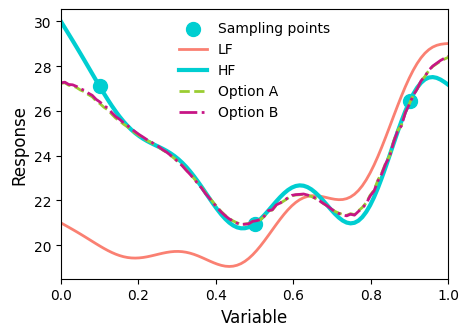

In [117]:
# Importing the Matplotlib library for plotting (if not already imported)
import matplotlib.pyplot as plt

# Initialize the Figure Dimensions
# Size is specified as [width, height] in inches
plt.figure(figsize=[5, 3.5])

# Scatter Plot of High-Fidelity Model (HFM) Sampling Points
# Points are colored dark turquoise and sized at 100 units
plt.scatter(x_sampHF, func_HF(x_sampHF), 100, c='darkturquoise', label='Sampling points')

# Line Plot of Low-Fidelity Model (LFM) Results
# The line color is salmon with a line width of 2
plt.plot(x, fLF, c='salmon', linewidth=2, label='LF')

# Line Plot of High-Fidelity Model (HFM) Results
# The line color is dark turquoise with a line width of 3
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Line Plot of Multi-Fidelity Surrogate Model (MFSM) - Option A
# Dashed line style, colored yellow-green with a line width of 2
plt.plot(x, y_MFSM_A(x), '--', c='yellowgreen', linewidth=2, label='Option A')

# Line Plot of Multi-Fidelity Surrogate Model (MFSM) - Option B
# Dash-dot line style, colored medium violet red with a line width of 2
plt.plot(x, y_MFSM_B(x), '-.', c='mediumvioletred', linewidth=2, label='Option B')

# Setting X-axis Limits
# Domain of the variable is set to [0, 1]
plt.xlim([0, 1])

# Adding Legend
# No frame around the legend and font size set to 10
plt.legend(frameon=False, fontsize=10)

# Labeling the X-axis
# Font size set to 12
plt.xlabel('Variable', fontsize=12)

# Labeling the Y-axis
# Font size set to 12
plt.ylabel('Response', fontsize=12)

# Displaying the Plot (uncomment if required)
# plt.show()
